✅ Accuracy: 0.7

✅ Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.57      1.00      0.73         4

    accuracy                           0.70        10
   macro avg       0.79      0.75      0.70        10
weighted avg       0.83      0.70      0.69        10

✅ Confusion Matrix:
 [[3 3]
 [0 4]]


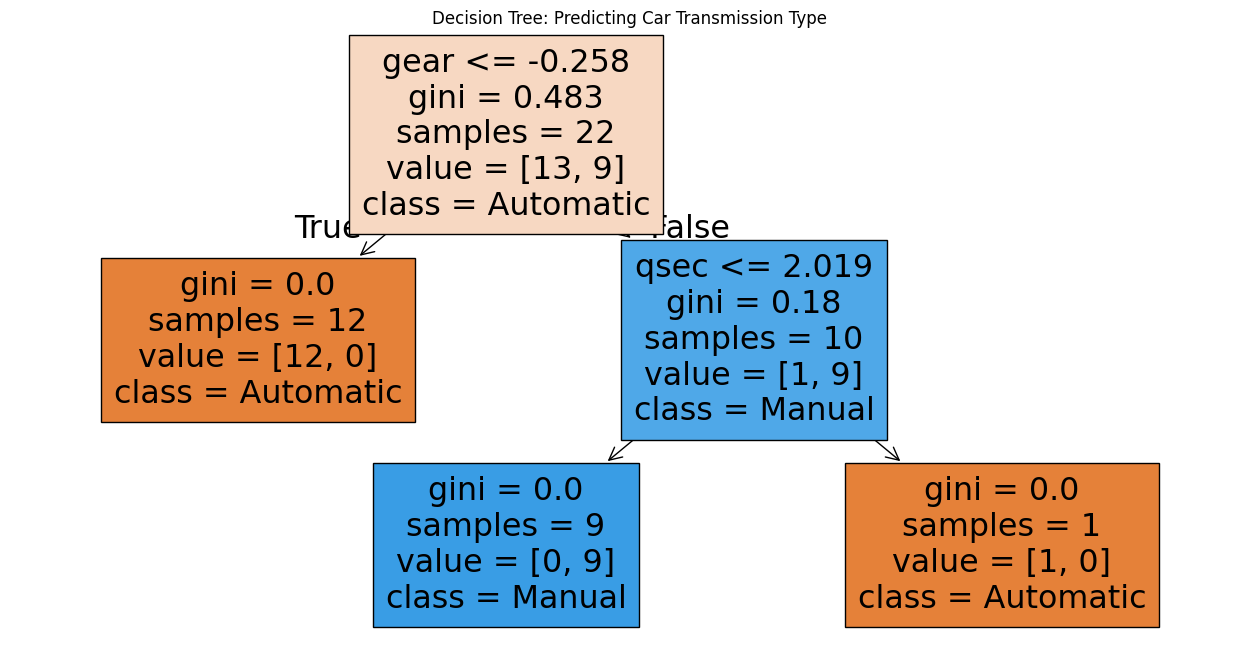

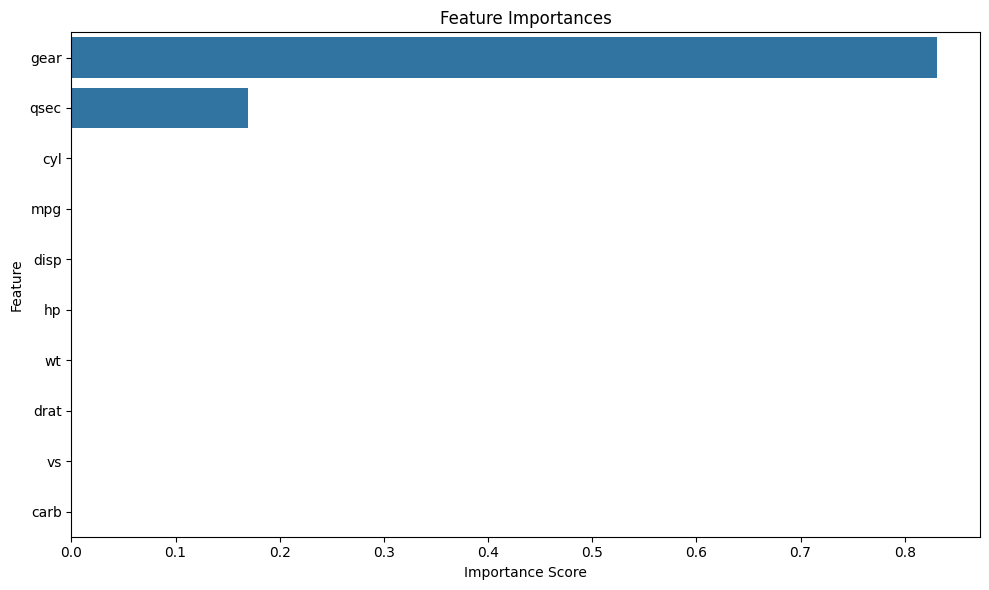

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load and clean the dataset
df = pd.read_csv("/content/mtcars.csv", header=None)
# First row holds the column names
df_clean = df[1:].copy()
df_clean.columns = df.iloc[0]
df_clean.reset_index(drop=True, inplace=True)

# Convert all feature columns (except 'model') to numeric
for col in df_clean.columns[1:]:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# Drop any rows with missing values
df_clean.dropna(inplace=True)

# Split into features and target
X = df_clean.drop(['model', 'am'], axis=1)
y = df_clean['am'].astype(int)

# Standardize feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# Train Decision Tree (no hyperparameter search)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))
print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize the tree
plt.figure(figsize=(16, 8))
plot_tree(clf,
          feature_names=X.columns,
          class_names=['Automatic', 'Manual'],
          filled=True)
plt.title("Decision Tree: Predicting Car Transmission Type")
plt.show()

# Plot feature importances
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=importances.index)
plt.title("Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
